In [18]:
%pip install numpy matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np

## Zadania do samodzielnego wykonania

1.

Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję $Z(w_{TV}, w_{radio}, w_{prasa})$. Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące.

2.

Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji $f(x) = sin(x)$ w przedziale $[-2\pi,2\pi]$. Proszę użyć $tanh$ jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

3.

Proszę pobrać zbiór california housing (można go załadować w sklearnie dzięki funkcji fetch_california_housing( ), jest też dostępny w colabie jako przykładowy plik testowy). Zawiera nieznormalizowane dane dotyczące bloków mieszkalnych w Kaliforni zebranych w 1990 roku, takie jak lokacja geograficzna, wiek, całkowita liczba mieszkańców bloku, znajdujących się w nim mieszkań i sypialni, oraz mediana dochodów tych mieszkańców. W ostatniej kolumnie znajduje się mediana wartości mieszkania w tym bloku. Proszę znormalizować dane, a następnie zaproponować kilka wielowarstowych sieci neuronowych i ocenić jak dobrze dokonają aproksymacji funkcji mediany wartości mieszkań za pomocą opisanych dzisiaj metryk. Proszę spróbować osiągnąć jak najlepszy wynik (jak najwyższe $R^2$). Wyniki oczywiście proszę sprawdzać na danych testujących.

4.

Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz uzyskanych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

5.

Proszę sprawdzić wyniki regresji dla zbioru california housing dla różnych podziałów na dane uczące i testujące (dla co najmniej pięciu podziałów 20-80, 35-65, 50-50, 65-35, 80-20) i wyciągnąć wnioski.

___________________________________
## Zadania dla chętnych

6*.

Można spróbować (już po normalizacji) zmniejszyć wymiarowość zbioru california housing. Żeby to osiągnąć, opcją jest np. odrzucić pierwsze dwie kolumny, albo dokonać zmniejszenia wymiarowości powszechnie używanym algorytmem PCA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, w dokumentacji są przykłady użycia). Wtedy można zbadać jak zmieni się działanie sieci po takim zabiegu.


___________________________________

## Materiały:

Dokumentacja:

* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

* https://developers.google.com/machine-learning/crash-course/california-housing-data-description?hl=pl


zad1.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor


arr = np.loadtxt('adv.txt', delimiter=',')

arr = arr[:, 1:]
x_train, x_test, y_train, y_test = train_test_split(arr[:, :-1], arr[:, -1], test_size=0.2, random_state=42)

network = MLPRegressor(hidden_layer_sizes=(5), activation='relu', solver='adam', max_iter=6000, random_state=42)

network.fit(x_train, y_train)

print(network.score(x_test, y_test))

network = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', solver='adam', max_iter=20000, random_state=42)

network.fit(x_train, y_train)

print(network.score(x_test, y_test))



0.8587422352011214
0.7573053161380885


Wynik lepszy o ~10% otrzymaliśmy dla relu, która dla tej samej ilości warstw co tanh, otrzymała ten wynik w znacznie mniejszej ilości iteracji.

zad2

'-3.3*tanh(0.66*x + 1.98) +10.29*tanh(0.12*x + -0.05) +-3.52*tanh(0.64*x + -1.92) +0.31'

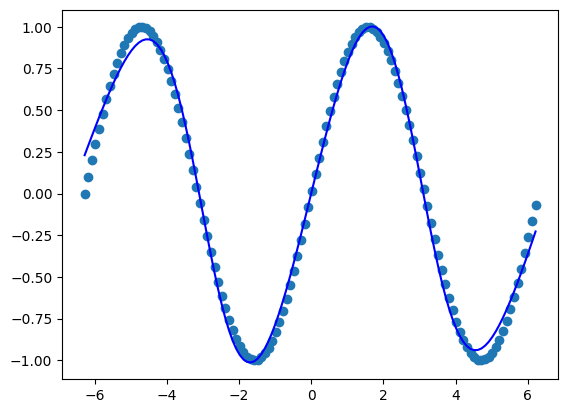

In [21]:
from matplotlib.pyplot import plot


x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.sin(x)
plot(x, y, 'o')

x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, test_size=0.2, random_state=42)

network2 = MLPRegressor(hidden_layer_sizes=(3), activation='tanh', solver='adam', max_iter=30000, tol = 1e-8, random_state=42)

network2.fit(x_train, y_train)

# print(network.score(x_test, y_test))

y_prediction = network2.predict(x.reshape(-1,1))
plot(x, y_prediction, 'b')

display(f"{round(network2.coefs_[1][0][0],2)}*tanh({round(network2.coefs_[0][0][0],2)}*x + {round(network2.intercepts_[0][0],2)}) +{round(network2.coefs_[1][1][0],2)}*tanh({round(network2.coefs_[0][0][1],2)}*x + {round(network2.intercepts_[0][1],2)}) +{round(network2.coefs_[1][2][0],2)}*tanh({round(network2.coefs_[0][0][2],2)}*x + {round(network2.intercepts_[0][2],2)}) +{round(network2.intercepts_[1][0],2)}")

# print(network2.coefs_[1][2][0])

# plot(x, F, 'r')



Wystarczyły zaledwie 3 warstwy by dokonać bardzo trafnej aproksymacji. Jendak trzeba było znacznie zmiejszyć wartość oczekiwanej dokładności, a ilość iteracji musiała zostać zwiększona.

3.

Proszę pobrać zbiór california housing (można go załadować w sklearnie dzięki funkcji fetch_california_housing( ), jest też dostępny w colabie jako przykładowy plik testowy). Zawiera nieznormalizowane dane dotyczące bloków mieszkalnych w Kaliforni zebranych w 1990 roku, takie jak lokacja geograficzna, wiek, całkowita liczba mieszkańców bloku, znajdujących się w nim mieszkań i sypialni, oraz mediana dochodów tych mieszkańców. W ostatniej kolumnie znajduje się mediana wartości mieszkania w tym bloku. Proszę znormalizować dane, a następnie zaproponować kilka wielowarstowych sieci neuronowych i ocenić jak dobrze dokonają aproksymacji funkcji mediany wartości mieszkań za pomocą opisanych dzisiaj metryk. Proszę spróbować osiągnąć jak najlepszy wynik (jak najwyższe $R^2$). Wyniki oczywiście proszę sprawdzać na danych testujących.

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn import preprocessing

ch_arr = fetch_california_housing()

norm_arr = preprocessing.StandardScaler().fit_transform(ch_arr['data'])
norm_y = preprocessing.StandardScaler().fit_transform(ch_arr['target'].reshape(-1,1))

display(norm_arr[:,-1].shape)
display(norm_arr[:,:-1].shape)

x_train, x_test, y_train, y_test  = train_test_split(norm_arr,np.ravel(norm_y), test_size=0.2)


clf = MLPRegressor(hidden_layer_sizes=(5,5,5), activation='relu', solver='adam', max_iter=2000)

clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))

clf = MLPRegressor(hidden_layer_sizes=(80,80,80,80,80), activation='relu', solver='adam', max_iter=2000)

clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))


clf = MLPRegressor(hidden_layer_sizes=(5,5,5), activation='tanh', solver='adam', max_iter=2000)

clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))


clf = MLPRegressor(hidden_layer_sizes=(5,5,5), activation='logistic', solver='adam', max_iter=2000)

clf.fit(x_train, y_train)

print(clf.score(x_test, y_test))










(20640,)

(20640, 7)

0.7697291040658973
0.7717312396499107
0.7698431698082691
0.7324395394306837


Wyniki we wszystkich przypadkach są do siebie zbliżone. Najlepiej wypada relu dla (80,80,80,80,80), jednak dla (5,5,5) warstw, wartość jest niemalże taka sama. 

4.

Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz uzyskanych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

/home/michaelangelo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/michaelangelo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/michaelangelo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/michaelangelo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/michaelangelo/.loc

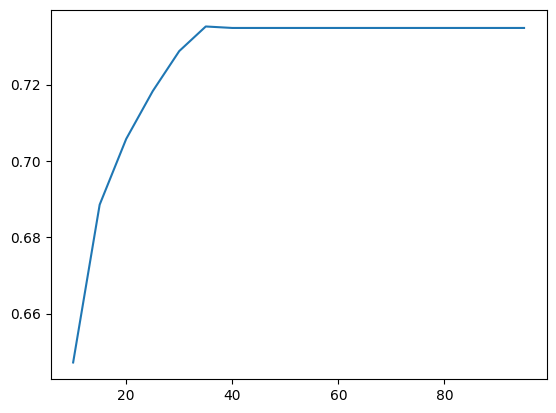

In [23]:


val_arr = []
my_range = range(10,100,5)
for i in my_range:
    network = MLPRegressor(hidden_layer_sizes=(5,5,5), activation='relu', solver='adam', max_iter=i,tol=0.001 ,random_state=42)
    network.fit(x_train, y_train)
    val_arr.append(network.score(x_test, y_test))

plot(my_range, val_arr)


Wraz ze wzrostem ilości iteracji rośnie dokładność. Jak widzimy na początku dostajemy nawet uwagi, że nie jesteśmy w stanie osiągnąć preferowanej tolerancji.

5.

Proszę sprawdzić wyniki regresji dla zbioru california housing dla różnych podziałów na dane uczące i testujące (dla co najmniej pięciu podziałów 20-80, 35-65, 50-50, 65-35, 80-20) i wyciągnąć wnioski.

In [24]:
for i in [
    train_test_split(norm_arr,np.ravel(norm_y), test_size=0.2),
    train_test_split(norm_arr,np.ravel(norm_y), test_size=0.35),
    train_test_split(norm_arr,np.ravel(norm_y), test_size=0.50),
    train_test_split(norm_arr,np.ravel(norm_y), test_size=0.65),
    train_test_split(norm_arr,np.ravel(norm_y), test_size=0.80),
]:
    x_train, x_test, y_train, y_test = i
    network =MLPRegressor(hidden_layer_sizes=(25,25,25), activation='relu', solver='adam', max_iter=2000,tol=0.001 ,random_state=42)
    
    network.fit(x_train, y_train)
    print(network.score(x_test, y_test))



0.7685523770171923
0.7649895793322816
0.758127258641393
0.7436115223846242
0.7460597262869866


Wartości zbytnio sie nie różnią, gdyż miedzy najwyższą, a najniższą jest jedynie różnica ~3%, jednak można zaobserwować, iż najoptymalniejsze są podziały (0.2, 0.8) oraz (0.35, 0.65) 